<a href="https://colab.research.google.com/github/coretail/Hotel-Cancelation-Rate-Analysis/blob/main/hotel_cancelation_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# This is modified version of me and my team casptone project at RevoU Tech Academy Data Analyst Bootcamp
# we would like to know why people cancel booking order from the data from 2015 till 2017

In [8]:
from google.colab import drive
from google.colab import auth
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
file = '/content/drive/My Drive/hotel_bookings.csv'
df = pd.read_csv(file)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
dropCols = ['meal', 'required_car_parking_spaces', 'total_of_special_requests']
df.drop(dropCols, axis=1, inplace=True)

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000


In [15]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_

In [16]:
# Because there is too many costumer didnt fill the company name, we will delete company as well
df.drop('company', axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  country         

In [18]:
# Searching for outliers in lead time
Q1 = df['lead_time'].quantile(0.25)
Q3 = df['lead_time'].quantile(0.75)
IQR = Q3 - Q1

In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [20]:
df = df[(df['lead_time'] >= lower_bound) & (df['lead_time'] <= upper_bound)]

In [21]:
# Counting cancelation rate for every lead time and hotel
cancelation_rate_data = df.groupby(['lead_time', 'hotel'])['is_canceled'].mean().reset_index()

city_hotel_rate = cancelation_rate_data[cancelation_rate_data['hotel'] == 'City Hotel']
resort_hotel_rate = cancelation_rate_data[cancelation_rate_data['hotel'] == 'Resort Hotel']

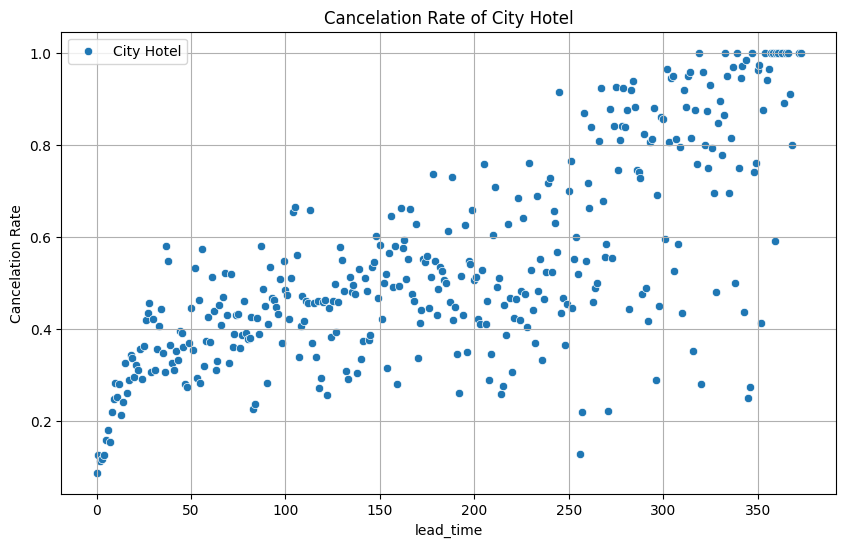

In [22]:
# Visualize cancelation rate based on lead time
plt.figure(figsize=(10,6))
sns.scatterplot(data = city_hotel_rate, x = 'lead_time', y = 'is_canceled', label = 'City Hotel', alpha = 1)

plt.xlabel('lead_time')
plt.ylabel('Cancelation Rate')
plt.title('Cancelation Rate of City Hotel')

plt.grid(True)
plt.show()

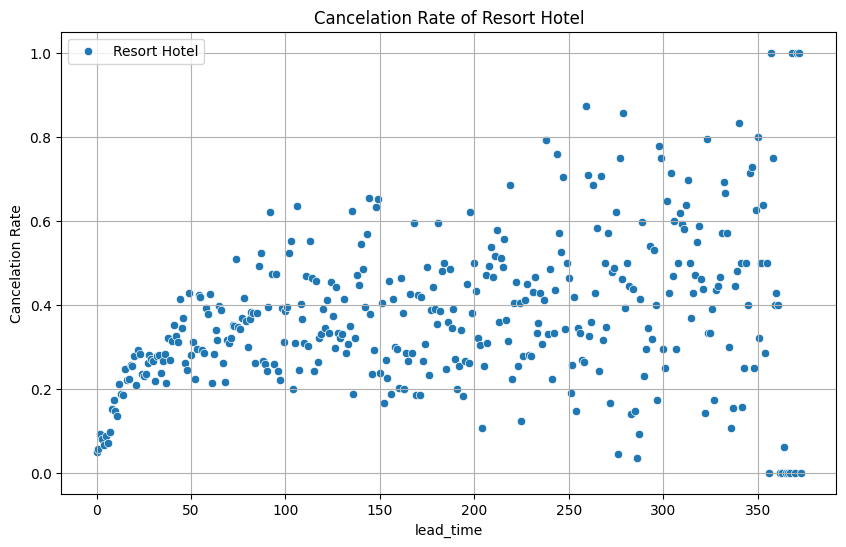

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = resort_hotel_rate, x = 'lead_time', y = 'is_canceled', label = 'Resort Hotel', alpha = 1)

plt.xlabel('lead_time')
plt.ylabel('Cancelation Rate')
plt.title('Cancelation Rate of Resort Hotel')

plt.grid(True)
plt.show()

<ipython-input-24-cffa63aceb97>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().round(2), square=True, annot=True)


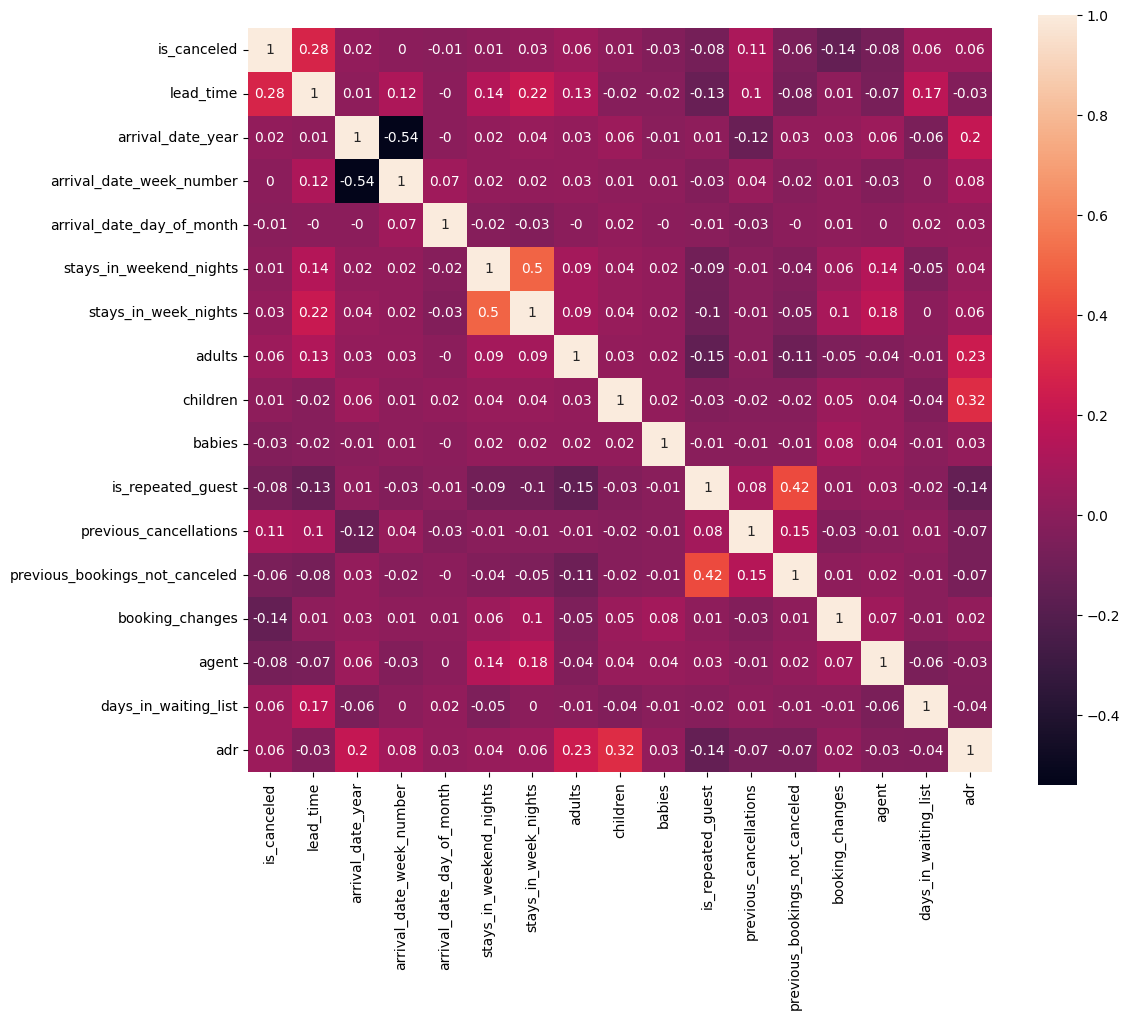

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr().round(2), square=True, annot=True)
plt.show()

We can see tha lead time is the most correlated to is_canceled or canceled booking order even thoug it only 28%

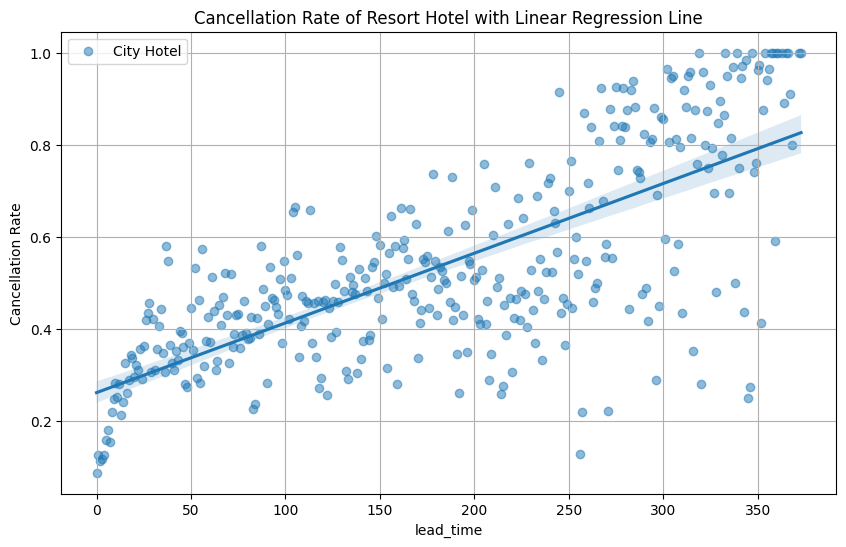

In [25]:
# Scatter plot with linear regression
plt.figure(figsize=(10, 6))
sns.regplot(data=city_hotel_rate, x='lead_time', y='is_canceled', label='City Hotel', scatter_kws={'alpha': 0.5})

plt.xlabel('lead_time')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate of Resort Hotel with Linear Regression Line')

plt.grid(True)
plt.legend()
plt.show()

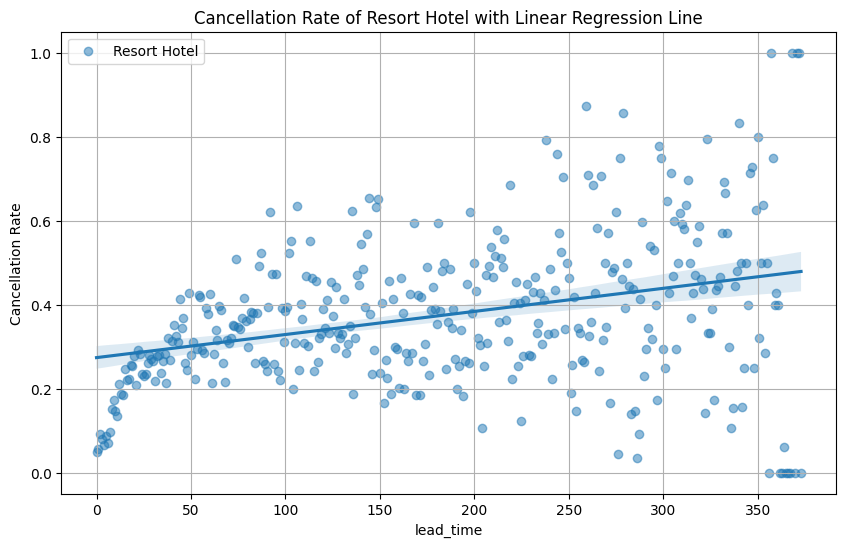

In [26]:
# Scatter plot dengan garis regresi
plt.figure(figsize=(10, 6))
sns.regplot(data=resort_hotel_rate, x='lead_time', y='is_canceled', label='Resort Hotel', scatter_kws={'alpha': 0.5})

plt.xlabel('lead_time')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate of Resort Hotel with Linear Regression Line')

plt.grid(True)
plt.legend()
plt.show()

In [27]:
city_hotel_rate

,lead_time,hotel,is_canceled
0,0,City Hotel,0.087810
2,1,City Hotel,0.124933
4,2,City Hotel,0.112389
6,3,City Hotel,0.116438
8,4,City Hotel,0.125475
...,...,...,...
731,366,City Hotel,1.000000
733,367,City Hotel,0.909091
735,368,City Hotel,0.800000
739,372,City Hotel,1.000000


In [28]:
resort_hotel_rate


,lead_time,hotel,is_canceled
1,0,Resort Hotel,0.048517
3,1,Resort Hotel,0.055172
5,2,Resort Hotel,0.091587
7,3,Resort Hotel,0.079345
9,4,Resort Hotel,0.066365
...,...,...,...
736,368,Resort Hotel,1.000000
737,370,Resort Hotel,0.000000
738,371,Resort Hotel,1.000000
740,372,Resort Hotel,1.000000


In [29]:
average_cancellation_rate = cancelation_rate_data['is_canceled'].mean()
print(f"Average Cancellation Rate: {average_cancellation_rate:.2%}")

Average Cancellation Rate: 45.81%


In [30]:
# Calculating the overall average cancellation rate for each hotel type
average_cancelation_rate = cancelation_rate_data.groupby('hotel')['is_canceled'].mean()

print("Average Cancellation Rate:")
print(average_cancelation_rate)


Average Cancellation Rate:
hotel
City Hotel      0.540776
Resort Hotel    0.376015
Name: is_canceled, dtype: float64


In [31]:
x = df[['lead_time']]
y = df['is_canceled']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [32]:
# Try linear regression model
model = LinearRegression()

In [33]:
model.fit(x_train, y_train)

LinearRegression()

In [34]:
y_predict = model.predict(x_test)

In [35]:
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.21
R-squared: 0.08


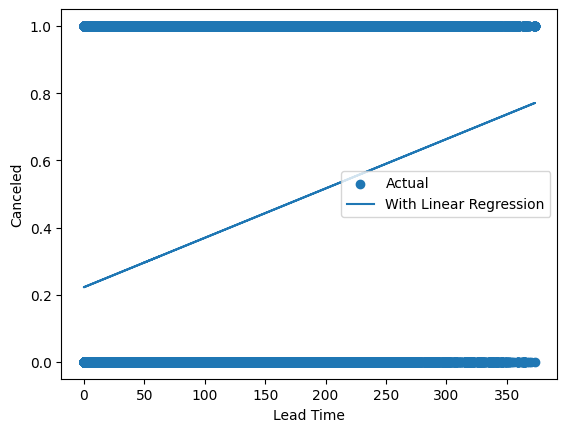

In [36]:
plt.scatter(x_test, y_test, label='Actual')
plt.plot(x_test, y_predict, label='With Linear Regression')
plt.xlabel('Lead Time')
plt.ylabel('Canceled')
plt.legend()
plt.show()

In [37]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [38]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred_rf = model_rf.predict(x_test)

In [40]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_roc_rf = roc_auc_score(y_test, y_pred_rf)

print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')
print(f'AUC-ROC Score (Random Forest): {auc_roc_rf:.2f}')
print('Classification Report (Random Forest):\n', classification_report(y_test, y_pred_rf))


Accuracy (Random Forest): 0.68
AUC-ROC Score (Random Forest): 0.60
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.69      0.89      0.78     18506
           1       0.61      0.31      0.41     10591

    accuracy                           0.68     29097
   macro avg       0.65      0.60      0.59     29097
weighted avg       0.66      0.68      0.64     29097



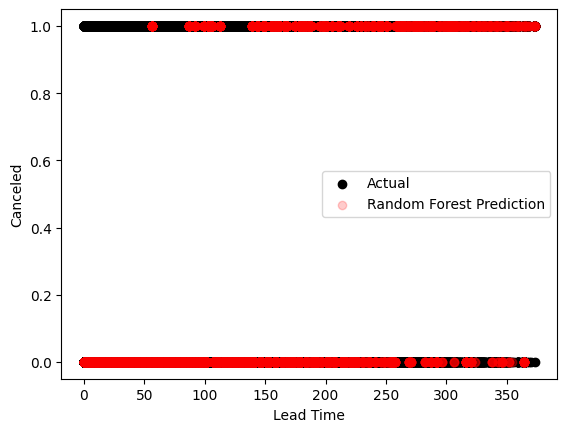

In [41]:
plt.scatter(x_test, y_test, color='black', label='Actual')
plt.scatter(x_test, y_pred_rf, color='red', alpha=0.2, label='Random Forest Prediction')
plt.xlabel('Lead Time')
plt.ylabel('Canceled')
plt.legend()
plt.show()

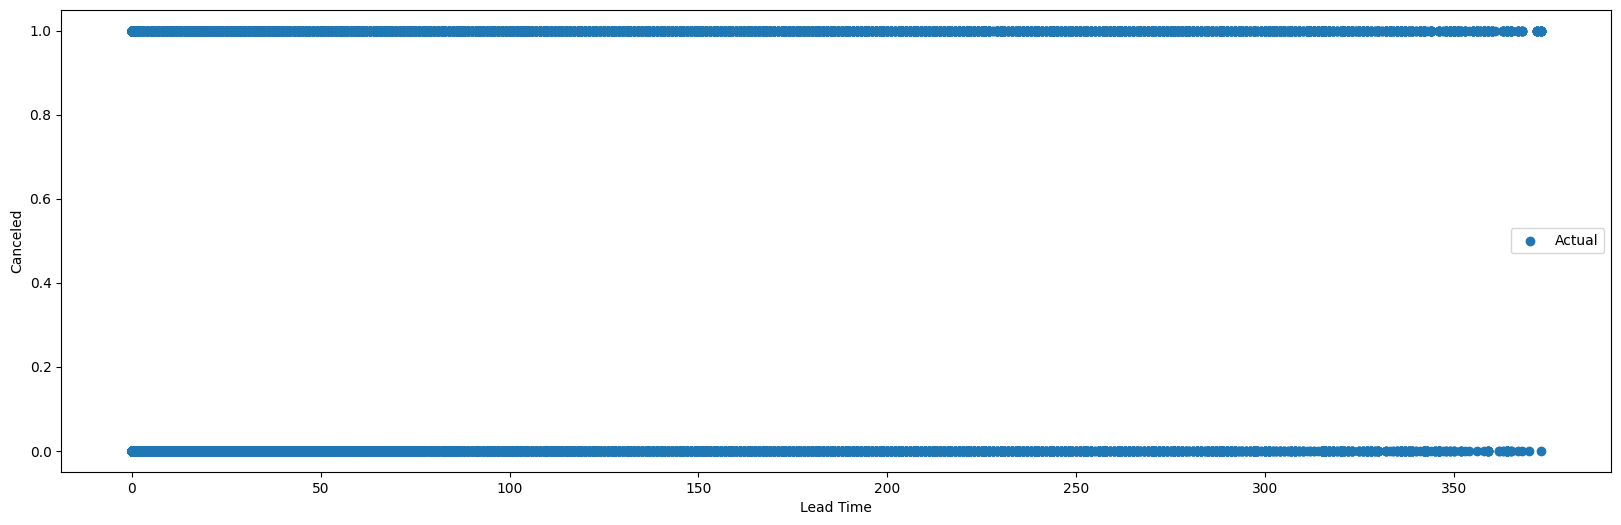

In [42]:
plt.figure(figsize=(20,6))
plt.scatter(x_test, y_test, label='Actual')
plt.xlabel('Lead Time')
plt.ylabel('Canceled')
plt.legend()
plt.show()

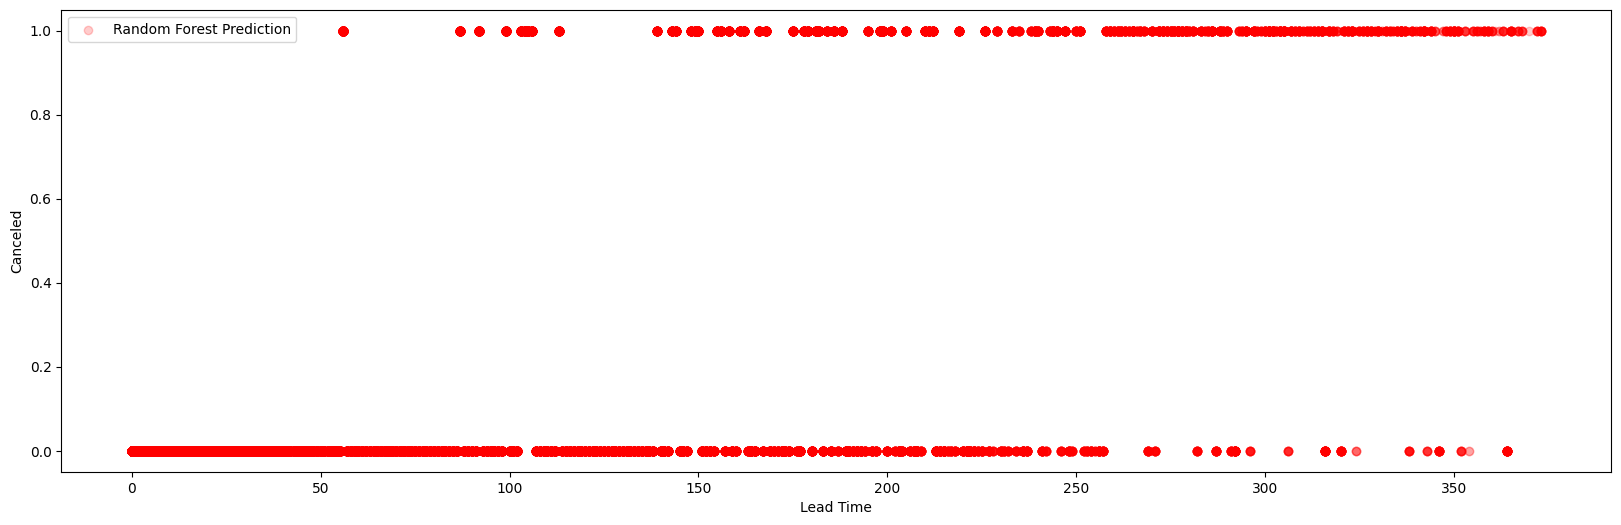

In [43]:
plt.figure(figsize=(20,6))
plt.scatter(x_test, y_pred_rf, color='red', alpha=0.2, label='Random Forest Prediction')
plt.xlabel('Lead Time')
plt.ylabel('Canceled')
plt.legend()
plt.show()

In the Random Forest model analysis, it is observed that for lead times between 0 and 200 days, the majority of instances do not result in cancellations. Conversely, for lead times exceeding 250 days, the majority tend to result in cancellations. This observation is supported by an accuracy of 68% on both the training and testing datasets.

In [47]:
df.to_csv('Hotel_analyzed.csv', index=False)

In [48]:
files.download('Hotel_analyzed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>